In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# Heart Failure Prediction

## Prerequisite

Pandas, Matplotlib, Seaborn, Sklearn

## What we do?

First I will do some EDA and visualization data. After that I will train model and find best model



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

# Import things I need

In [18]:
data = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
display(data)
display(data.describe())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


 ### Display dataset. We can know that all data type is num. So we don't need process that encode char to num. All we need is normalize, standandarlize dataset.
 
### When we see data, data range are different. For example "platelets" columns show higher figure than other columns. If we don't standardlize columns, accuracy of model can be decreased.

### First we start with EDA and preprocessing dataset

In [19]:
null_value = data.isnull().sum()
print(null_value)

# We check whether there are null_values and there are no null_values so we can pass this process

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


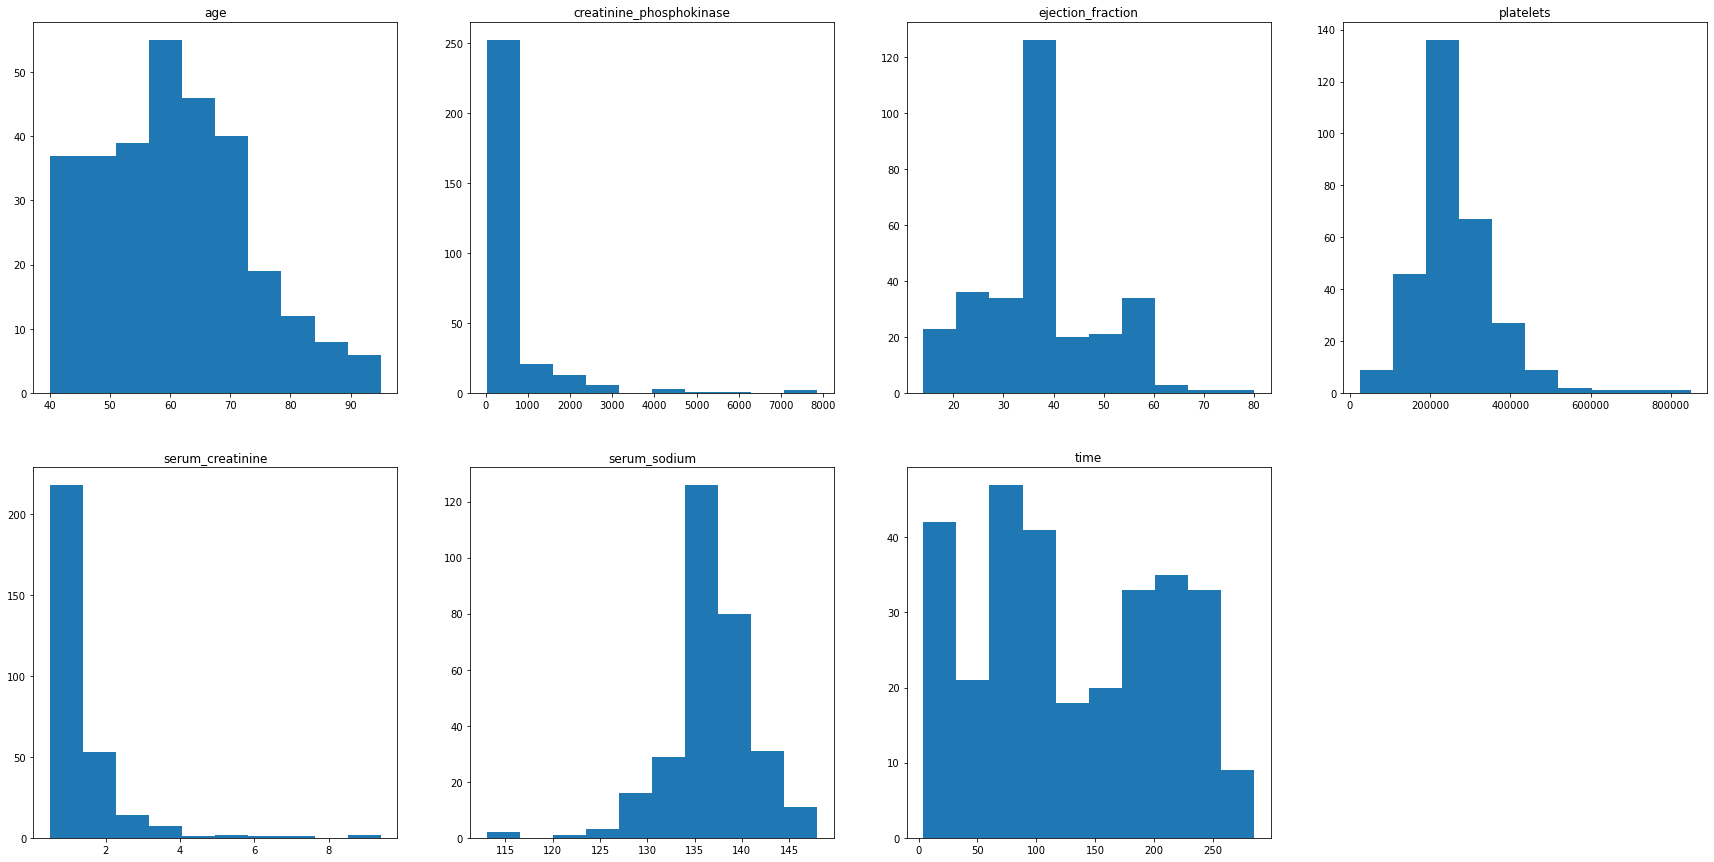

In [20]:
val_check = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

plt.figure(figsize=(30,15))
n1 = 0
for i in range(1,8):
    plt.subplot(2,4,i)
    plt.hist(data[val_check[n1]])
    plt.title(val_check[n1])
    n1 +=1
    
# We should also check whether data follow normal distribuion. We can find that "creatinine_phosphokinase" and "serum_creatinine" columns skewed a lot.

In [21]:
def logarithm(x):
    return np.log(x+1)

In [22]:
df_2 = data.copy()

log1 = data.creatinine_phosphokinase.apply(lambda x : logarithm(x)).to_frame()
log2 = data.serum_creatinine.apply(lambda x : logarithm(x)).to_frame()

df_2.drop(["creatinine_phosphokinase","serum_creatinine"],axis=1,inplace=True)


display(df_2)

# Normalize data through logarithm function.

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,20,1,265000.00,130,1,0,4,1
1,55.0,0,0,38,0,263358.03,136,1,0,6,1
2,65.0,0,0,20,0,162000.00,129,1,1,7,1
3,50.0,1,0,20,0,210000.00,137,1,0,7,1
4,65.0,1,1,20,0,327000.00,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155000.00,143,1,1,270,0
295,55.0,0,0,38,0,270000.00,139,0,0,271,0
296,45.0,0,1,60,0,742000.00,138,0,0,278,0
297,45.0,0,0,38,0,140000.00,140,1,1,280,0


,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase,serum_creatinine
0,75.0,0,0,20,1,265000.00,130,1,0,4,1,6.368187,1.064711
1,55.0,0,0,38,0,263358.03,136,1,0,6,1,8.969796,0.741937
2,65.0,0,0,20,0,162000.00,129,1,1,7,1,4.990433,0.832909
3,50.0,1,0,20,0,210000.00,137,1,0,7,1,4.718499,1.064711
4,65.0,1,1,20,0,327000.00,116,0,0,8,1,5.081404,1.308333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155000.00,143,1,1,270,0,4.127134,0.741937
295,55.0,0,0,38,0,270000.00,139,0,0,271,0,7.507141,0.788457
296,45.0,0,1,60,0,742000.00,138,0,0,278,0,7.630947,0.587787
297,45.0,0,0,38,0,140000.00,140,1,1,280,0,7.789040,0.875469


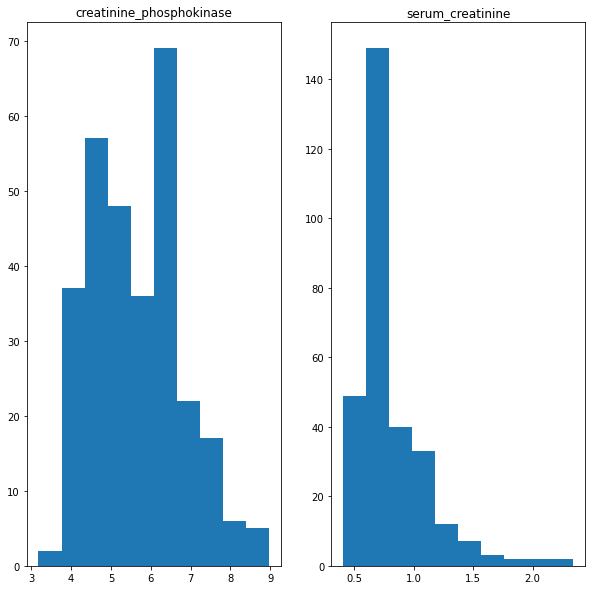

In [23]:
df_3 = pd.concat([df_2,log1,log2],axis=1)
display(df_3)

result_val = ["creatinine_phosphokinase","serum_creatinine"]

plt.figure(figsize=(10,10))
for j in range(0,2):
    plt.subplot(1,2,j+1)
    plt.hist(df_3[result_val[j]])
    plt.title(result_val[j])

In [24]:
from sklearn.preprocessing import MinMaxScaler

# As I mentioned earlier, we should stasndardilize each variables so that one variable can not affect to the result more than other variables. So I use MinMaxScaler 

In [25]:
scaler = MinMaxScaler()
df_4 = pd.DataFrame(scaler.fit_transform(df_3),columns=df_3.columns)
display(df_4)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase,serum_creatinine
0,0.636364,0.0,0.0,0.090909,1.0,0.290823,0.485714,1.0,0.0,0.000000,1.0,0.550807,0.340460
1,0.272727,0.0,0.0,0.363636,0.0,0.288833,0.657143,1.0,0.0,0.007117,1.0,1.000000,0.173767
2,0.454545,0.0,0.0,0.090909,0.0,0.165960,0.457143,1.0,1.0,0.010676,1.0,0.312925,0.220748
3,0.181818,1.0,0.0,0.090909,0.0,0.224148,0.685714,1.0,0.0,0.010676,1.0,0.265973,0.340460
4,0.454545,1.0,1.0,0.090909,0.0,0.365984,0.085714,0.0,0.0,0.014235,1.0,0.328632,0.466275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,1.0,0.363636,1.0,0.157474,0.857143,1.0,1.0,0.946619,0.0,0.163868,0.173767
295,0.272727,0.0,0.0,0.363636,0.0,0.296884,0.742857,0.0,0.0,0.950178,0.0,0.747459,0.197792
296,0.090909,0.0,1.0,0.696970,0.0,0.869075,0.714286,0.0,0.0,0.975089,0.0,0.768835,0.094158
297,0.090909,0.0,0.0,0.363636,0.0,0.139290,0.771429,1.0,1.0,0.982206,0.0,0.796131,0.242728


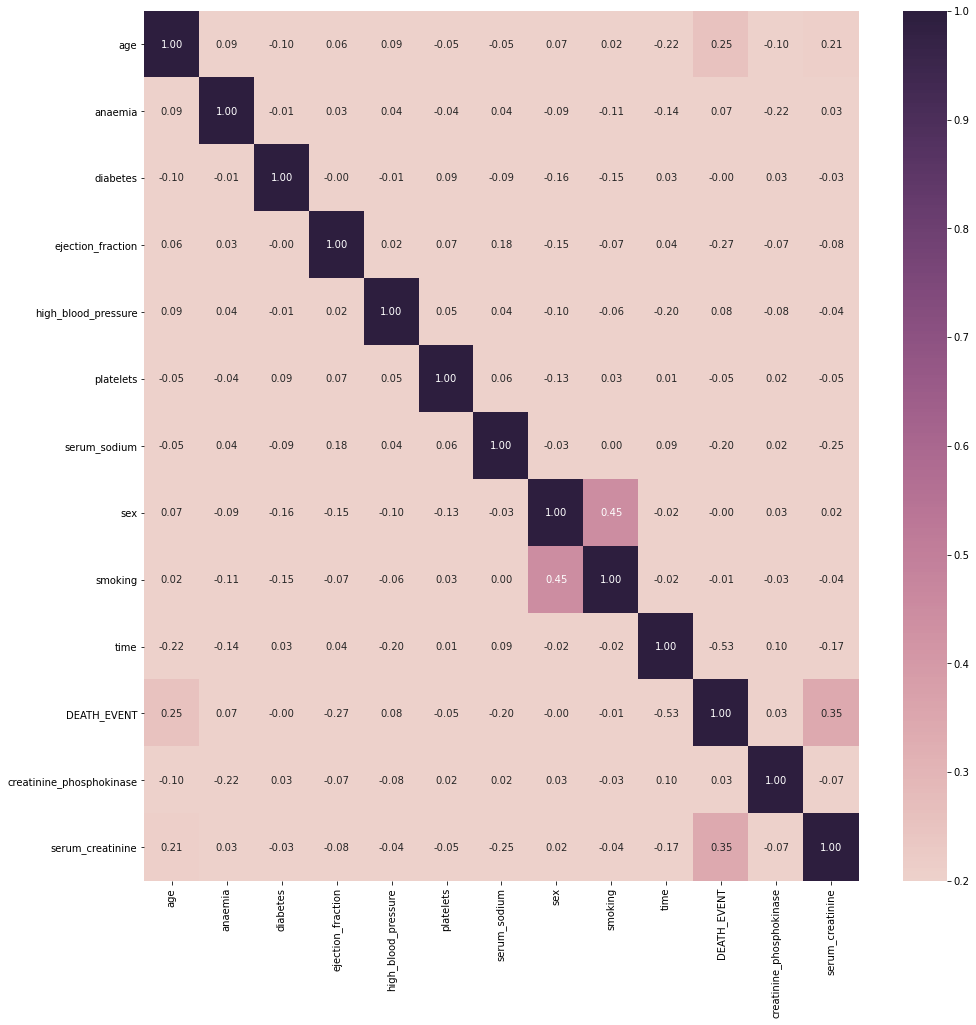

In [26]:
corr = df_4.corr()
plt.figure(figsize=(16,16))
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(corr,fmt=".2f",annot=True,cmap=cmap,vmin=0.2)

# When we see "Death_event", "age" and "serum_creatinine" affect most

### We finish seeing and preprocessing dataset. After this, we will train model and evaluate model through accuracy score and f1 score

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

# For classification I choose RandomForestClassifier, AdaBoostClassifier and Support Vector machine.

In [34]:
X = df_4.loc[:,df_4.columns != "DEATH_EVENT"]
y = df_4.loc[:,"DEATH_EVENT"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=62)

# Split data and define X_train, X_test, y_train, y_test to train model. I define y variable as "Death event" which indicate whether patient deceased.
# I import Fbeta_score and I will weight more to recall rather than precision because data that I classified should reflect well about real data. 

In [36]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
model1_preds = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,model1_preds)
fbeta_1 = fbeta_score(y_test,model1_preds,beta=1.5)
print("Accuracy of RandomForestClassifier : {}  fbeta score : {}".format(accuracy1,fbeta_1))

# First I train RandomForestClassifier and test it. Accuracy_score is 0.84 and f1_score is 0.74. Not bad

Accuracy of RandomForestClassifier : 0.84  fbeta score : 0.7459016393442622


In [37]:
model2 = AdaBoostClassifier()
model2.fit(X_train,y_train)
model2_preds = model2.predict(X_test)
Accuracy2 = accuracy_score(y_test,model2_preds)
fbeta_2 = fbeta_score(y_test,model2_preds,beta=1.5)
print("Accuracy of AdaBoostClassifier : {} fbeta score : {}".format(Accuracy2,fbeta_2))

Accuracy of AdaBoostClassifier : 0.8 fbeta score : 0.7409326424870465


In [38]:
model3 = SVC()
model3.fit(X_train,y_train)
model3_preds = model3.predict(X_test)
Accuracy3 = accuracy_score(y_test,model3_preds)
fbeta_3 = fbeta_score(y_test,model3_preds,beta=1.5)
print("Accuracy of SVC : {} fbeta score : {}".format(Accuracy3,fbeta_3))

Accuracy of SVC : 0.72 fbeta score : 0.41401273885350315


### As a result, RandomForestClassifier shows highest Accuracy score and fbeta score so I will choose model1. And through this model I will do gridsearch so that I can improve my model.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time

# Import things that I need. Also I import make_scorer for scoring. In this case I also use fbeta_score that has beta = 1.5. 
# Also I import time so that I can measure time for searching best estimator.

In [50]:
scorer = make_scorer(fbeta_score,beta=1.5)
parameters = {
    "n_estimators" : [100,150,200,250,300],
    "min_samples_split" : [2,4,6],
    "min_samples_leaf" : [4,6,8],
    "max_depth" : [80,100,150,200]
    
}

start = time.time()
grid = GridSearchCV(estimator=model1,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=2)
grid.fit(X_train,y_train)
end = time.time()

print("Search Time : {} seconds".format(end-start))

grid.best_params_

# Check RandomForestClassifier parameters here "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"

Search Time : 64.71348333358765 seconds


{'max_depth': 100,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 250}

In [51]:
model4 = grid.best_estimator_
model4_preds = model4.predict(X_test)
Accuracy4 = accuracy_score(y_test,model4_preds)
fbeta_4 = fbeta_score(y_test,model4_preds,beta=1.5)
print("GridSearch accuracy : {} fbeta score : {}".format(Accuracy4,fbeta_4))

# Through GridSearch I can improve my model. Accuracy : 0.84 → 0.86 Fbeta : 0.74 → 0.78

GridSearch accuracy : 0.8666666666666667 fbeta score : 0.7814207650273223


,importance
age,0.679
anaemia,0.701
diabetes,0.736
ejection_fraction,0.743
high_blood_pressure,0.769
platelets,5.440
serum_sodium,5.662
sex,6.165
smoking,9.556
time,11.755


Text(0.5, 1.0, 'Feature importance')

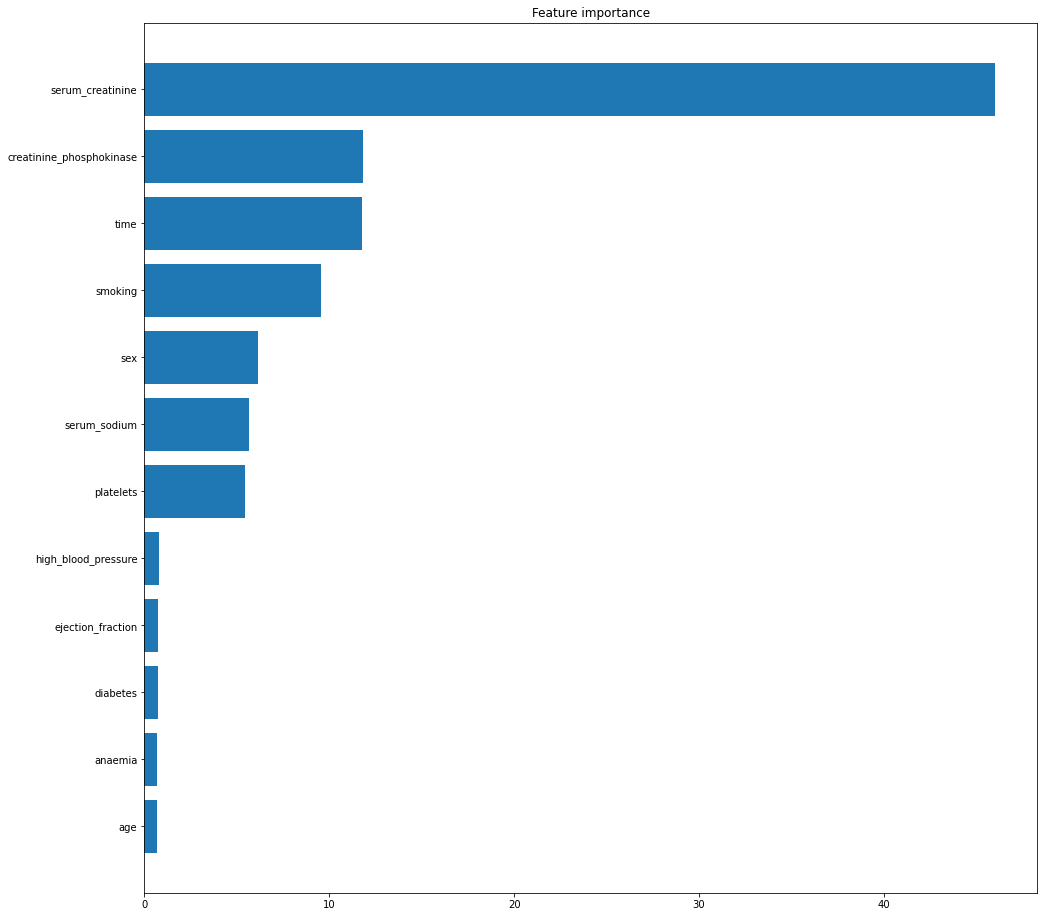

In [77]:
Importance = np.sort(np.round(model4.feature_importances_*100,3))
df_feature = pd.DataFrame({
    "importance" : Importance
},index=X_train.columns)
display(df_feature)

plt.figure(figsize=(16,16))
plt.barh(df_feature.index.to_list(),df_feature.importance)
plt.title("Feature importance")

# Through RandomForestClassifier, we can check feature importance. Through using numpy, sort values and make dataframe.

### This is end of my code. Thank you for seeing my code!